In [160]:
!pip install proplot
import warnings
warnings.filterwarnings('ignore') 

You should consider upgrading via the 'C:\Users\khan1\anaconda3\python.exe -m pip install --upgrade pip' command.


In [161]:
import pandas as pd
import numpy as np

train = pd.read_csv('C:/Users/khan1/OneDrive/Documents/867/Assignment 1/train.csv')
test = pd.read_csv('C:/Users/khan1/OneDrive/Documents/867/Assignment 1/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [162]:
# Defining plots design
def plots_design():
    fig.patch.set_facecolor('black')
    ax.patch.set_facecolor('black')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.yaxis.set_label_coords(0, 0)
    ax.grid(color='white', linewidth=2)
    # Remove ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    # Remove axes splines
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    # Font
    mpl.rcParams['font.family'] = 'Source Sans Pro'

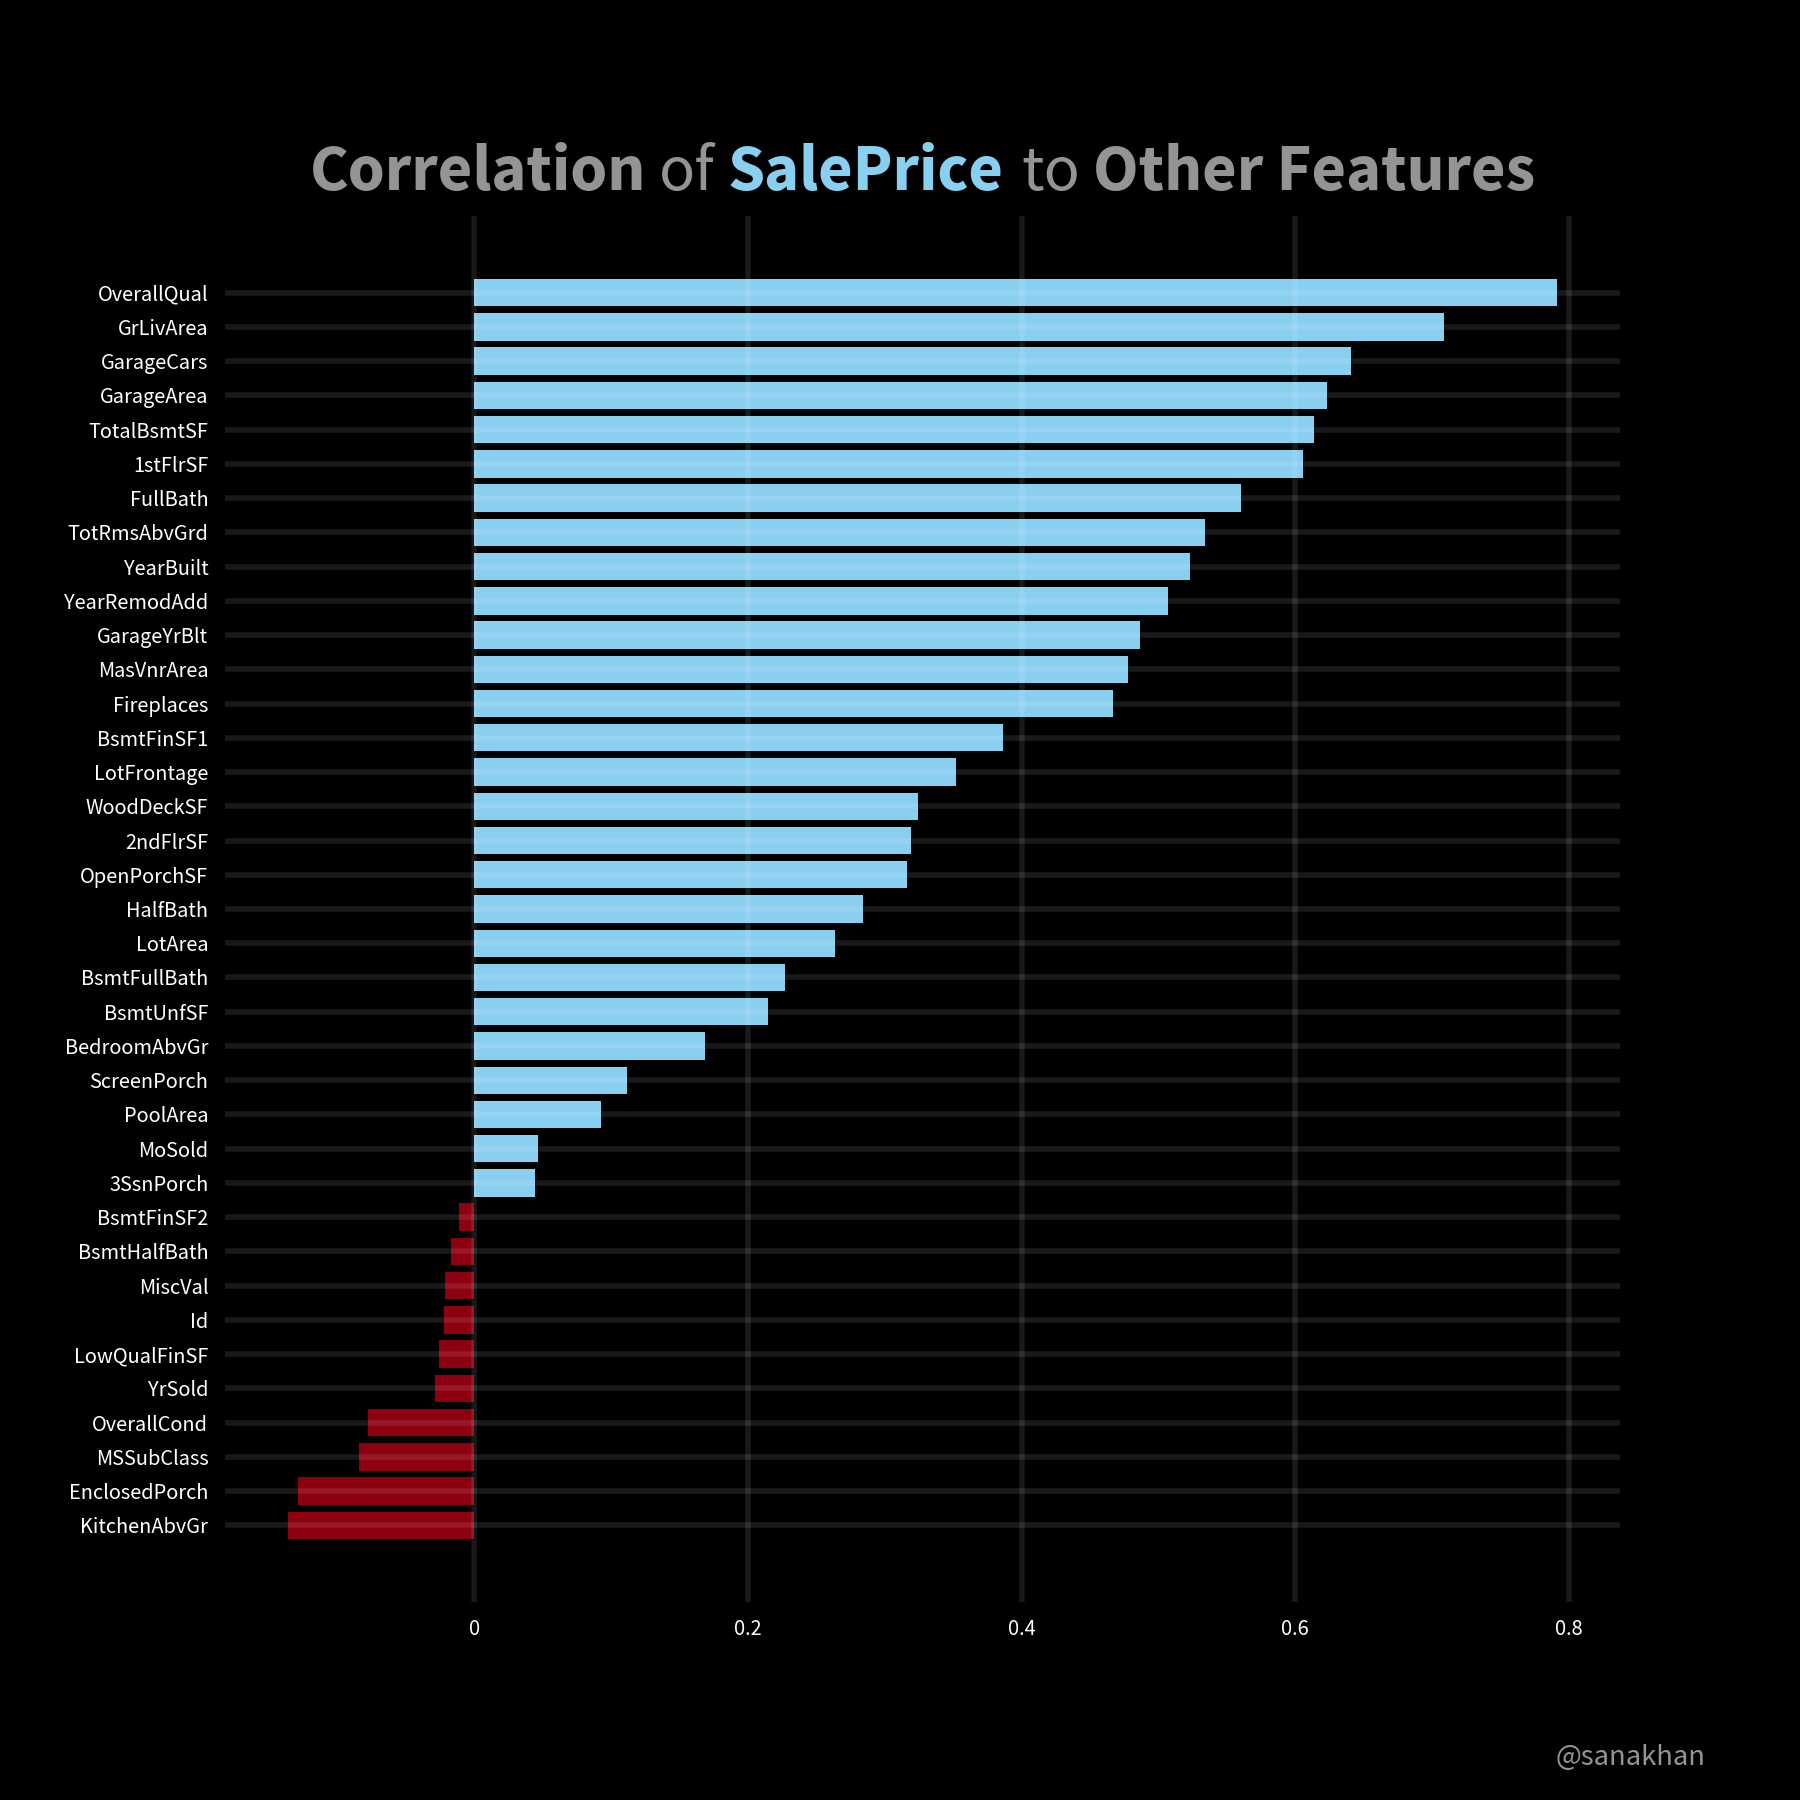

In [163]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import proplot as pplt

corr = train[train.columns].corr()['SalePrice'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.SalePrice > 0.99].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 9))

ax.barh(corr.index, corr.SalePrice, align='center', color = np.where(corr['SalePrice'] < 0, 'crimson', '#89CFF0'))

plots_design()

plt.text(-0.12, 39, "Correlation", size=24, color="grey", fontweight="bold");
plt.text(0.135, 39, "of", size=24, color="grey");
plt.text(0.185, 39, "SalePrice", size=24, color="#89CFF0", fontweight="bold");
plt.text(0.4, 39, "to", size=24, color="grey");
plt.text(0.452, 39, "Other Features", size=24, color="grey", fontweight="bold");

# Author
plt.text(0.9, -7, "@sanakhan", fontsize=11, ha="right", color='grey');

In [164]:

print('Training Shape:', train.shape)
print('Test Shape:', test.shape)

Training Shape: (1460, 81)
Test Shape: (1459, 80)


In [165]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [166]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [167]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

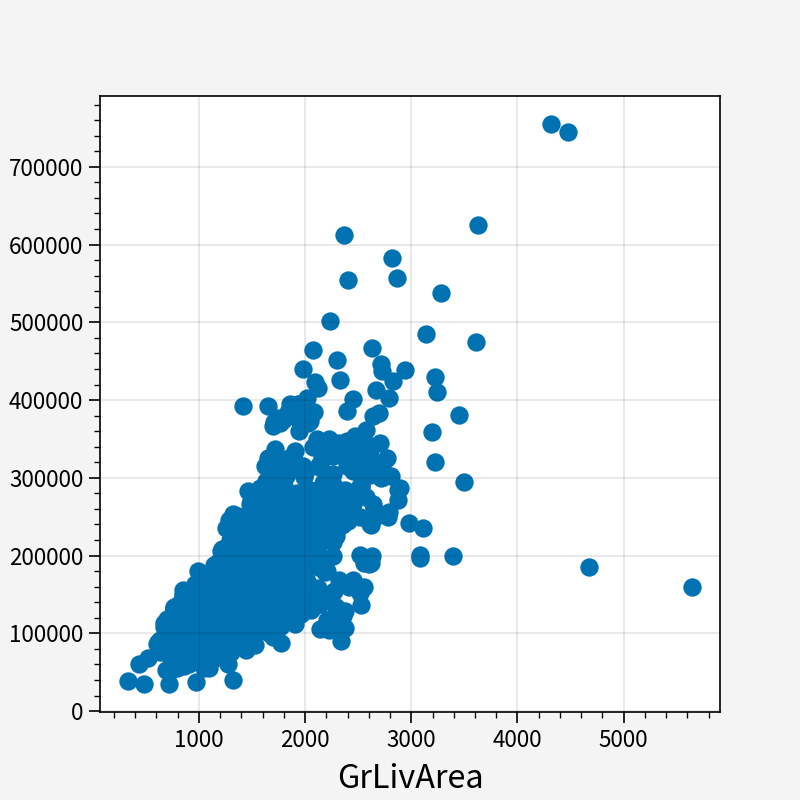

In [168]:
#data cleaning
#checking for outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [169]:
#removing outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


 mu = 180932.92 and sigma = 79467.79



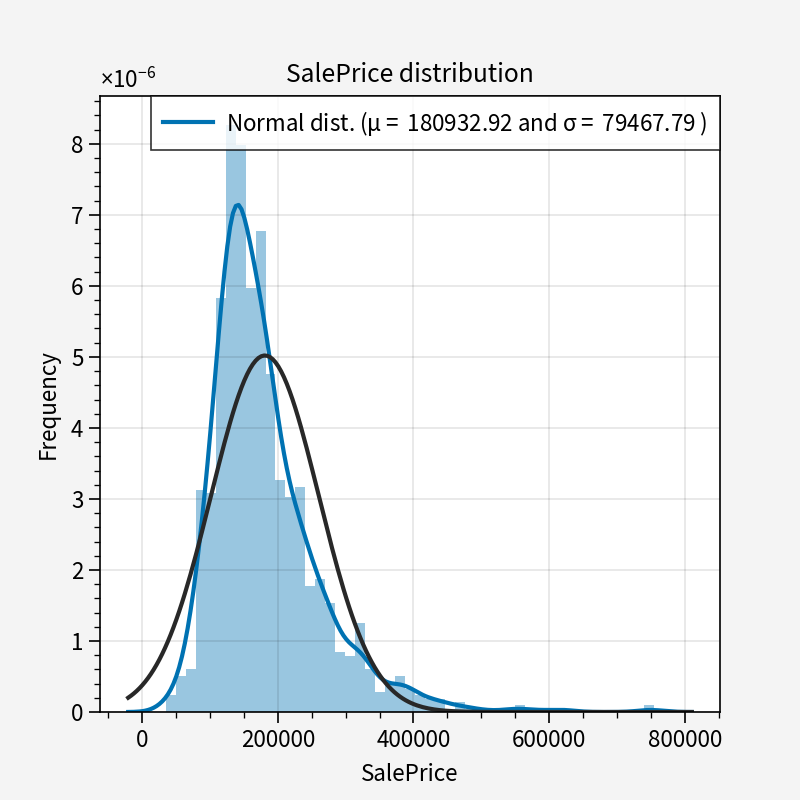

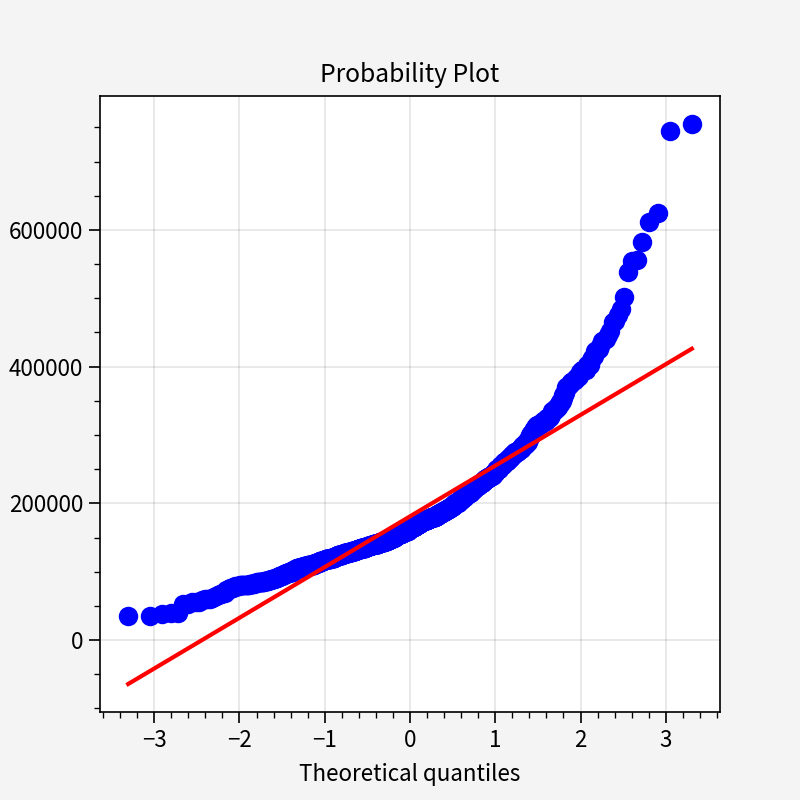

In [171]:

from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



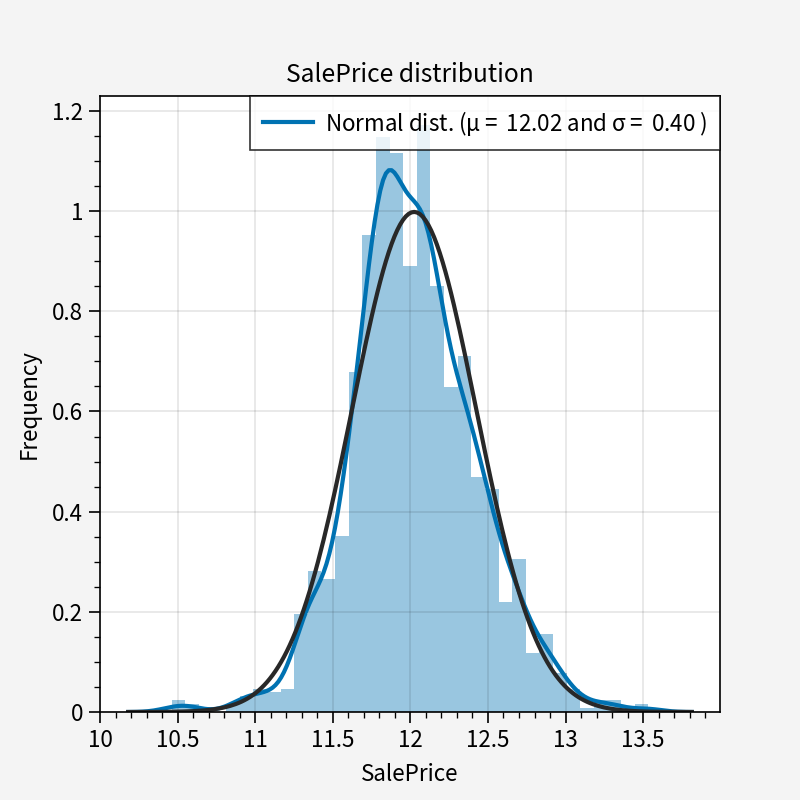

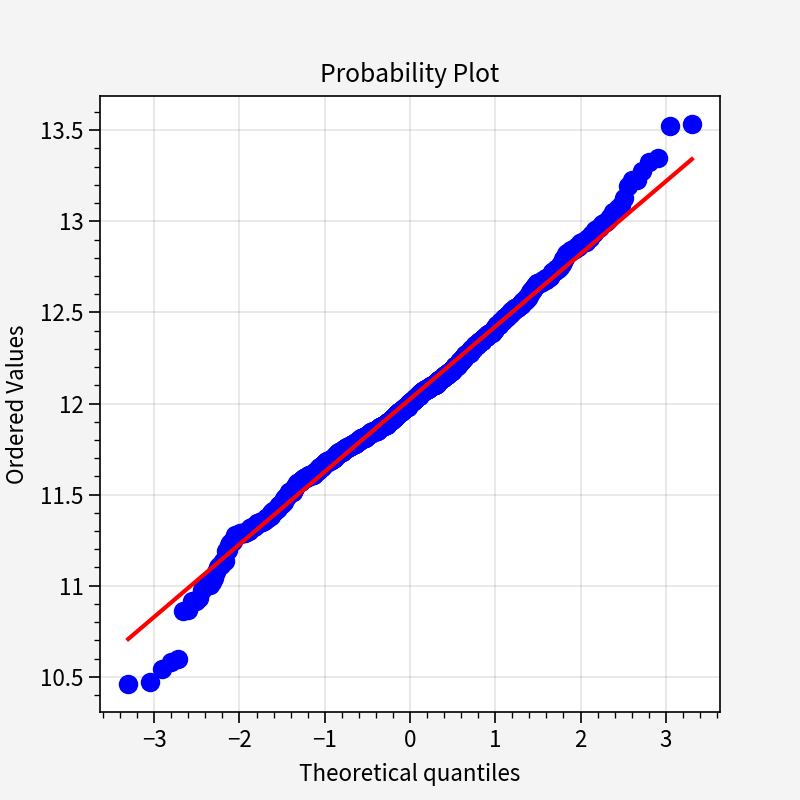

In [172]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column


train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [174]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))


data size is : (2917, 80)


In [175]:
print('Missing Values ')
data.isnull().sum().sort_values(ascending=False).head(25)

Missing Values 


PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
GarageCars         1
KitchenQual        1
dtype: int64

In [176]:
data['PoolQC'] = data['PoolQC'].fillna('None')

In [177]:
data['Fence'] = data['Fence'].fillna('None')

In [178]:
data['Alley'] = data['Alley'].fillna('None')

In [179]:
data['MiscFeature'] = data['MiscFeature'].fillna('None')

In [180]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

In [181]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda i: i.fillna(i.median()))

In [182]:
garage_cols = [col for col in data if col.startswith('Garage')]
data[garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2.0,548.0,TA,TA
1,Attchd,1976.0,RFn,2.0,460.0,TA,TA
2,Attchd,2001.0,RFn,2.0,608.0,TA,TA
3,Detchd,1998.0,Unf,3.0,642.0,TA,TA
4,Attchd,2000.0,RFn,3.0,836.0,TA,TA
...,...,...,...,...,...,...,...
2912,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2913,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2914,Detchd,1960.0,Unf,2.0,576.0,TA,TA
2915,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [183]:
# For the quantitative values:
for i in data[garage_cols].select_dtypes(exclude='object').columns:
    data[i] = data[i].fillna(0)

# For the qualitative values:
for i in data[garage_cols].select_dtypes(include='object').columns:
    data[i] = data[i].fillna('None')

In [184]:
basement_cols = [col for col in data if col.startswith('Bsmt')]

# For the quantitative values:
for i in data[basement_cols].select_dtypes(exclude='object').columns:
    data[i] = data[i].fillna(0)

# For the qualitative values:
for i in data[basement_cols].select_dtypes(include='object').columns:
    data[i] = data[i].fillna('None')

In [185]:
mas_cols = [col for col in data if col.startswith('Mas')]

# For the quantitative values:
for i in data[mas_cols].select_dtypes(exclude='object').columns:
    data[i] = data[i].fillna(0)

# For the qualitative values:
for i in data[mas_cols].select_dtypes(include='object').columns:
    data[i] = data[i].fillna('None')

In [186]:
data['MSZoning'] = data.groupby('Neighborhood')['MSZoning'].transform(lambda i: i.fillna(i.value_counts().index[0]))

In [187]:
print('Remaining missing values:')
data.isnull().sum().sort_values(ascending=False).head(15)

Remaining missing values:


Functional      2
Utilities       2
Electrical      1
SaleType        1
Exterior2nd     1
TotalBsmtSF     1
Exterior1st     1
KitchenQual     1
KitchenAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
TotRmsAbvGrd    0
Id              0
BedroomAbvGr    0
dtype: int64

In [188]:
data = data.fillna(data.mode().iloc[0])

In [189]:
#Transforming some numerical variables that are really categorical

data['MSSubClass'] = data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [190]:
#changing categorical variables with the help of lable encoder
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape data: {}'.format(data.shape))

Shape data: (2917, 80)


In [191]:
#adding features
data['TotalSqureFeet'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']


data['Total_Bathrooms'] = (data['FullBath'] 
                               + (0.5 * data['HalfBath']) 
                               + data['BsmtFullBath'] 
                               + (0.5 * data['BsmtHalfBath'])
                              )
                               

data['Total_porch_sf'] = (data['OpenPorchSF'] 
                              + data['3SsnPorch'] 
                              + data['EnclosedPorch'] 
                              + data['ScreenPorch'] 
                              + data['WoodDeckSF']
                             )

In [192]:
#checking for skewness
skewed_values = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[skewed_values].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in columns: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in columns: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [193]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    
    data[feat] = boxcox1p(data[feat], lam)


There are 63 skewed numerical features to Box Cox transform


In [194]:
data = pd.get_dummies(data)
print(data.shape)

(2917, 226)


In [196]:
train = data[:ntrain]
test = data[ntrain:]

In [211]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [212]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [213]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [214]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0075)



In [215]:
alphas = np.geomspace(1e-9, 5, num=100)

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)

In [217]:
score = rmsle_cv(ridgecv)
print(" Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Ridge score: 0.1180 (0.0084)



In [221]:
#ensembling models
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [223]:
averaged_models = AveragingModels(models = (ridgecv, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1128 (0.0080)



In [224]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [229]:
averaged_models.fit(train.values, y_train)
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))


print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred))

RMSLE score on train data:
0.09832439436945117


In [257]:
y_test=stacked_pred

In [259]:
y_test

array([118430.29494376, 156879.65494112, 183368.31902746, ...,
       171504.52785915, 117758.01153986, 222651.21050913])

In [263]:
sample=pd.read_csv('C:/Users/khan1/OneDrive/Documents/867/Assignment 1/sample_submission.csv')
submission=pd.DataFrame({"Id":sample['Id'],
                         "SalePrice":y_test})
submission.to_csv('submission_final.csv',index=False)